In [1]:
import os
import numpy as np
import scipy.spatial.distance as sd
import matplotlib.pyplot as plt
from tesser import util
import pandas as pd
from tesser import sr
from tesser import tasks
from tesser import util
from tesser import rsa
import importlib
from scipy.spatial import distance
from scipy import stats
#work desktop:
data_dir = '/Users/athula/Dropbox/Experiments/tesser_successor/Data/'
#laptop:
#data_dir = '/Users/athulapudhiyidath/Dropbox/Experiments/tesser_successor/Data'
roi_dir = os.path.join(data_dir, 'item_betas', 'roi')

In [2]:
#read in individual induct fits, which match alpha + gamma + tau values of structure learning SR 
#based on participants' performance in the inductive inference task

induct_fits = pd.read_csv('individual_induct_fits.csv')
induct_fits

,gamma,alpha,tau,subject,log_like
0,1.000000,0.868520,0.406615,100,-28.982943
1,0.992111,0.712560,2.711327,101,-25.406295
2,0.776361,0.022944,0.725353,102,-20.825487
3,0.925354,0.685406,1.307407,103,-25.866600
4,1.000000,0.956121,0.941730,104,-28.361274
5,1.000000,0.129351,2.040554,105,-22.919007
6,0.703446,0.103798,0.894549,106,-24.974311
7,0.992474,0.937901,1.465202,107,-27.662623
8,0.997764,0.600534,0.656197,108,-28.698749
9,0.683364,0.000381,0.467239,109,-19.505478


In [3]:
subject = 102
roi = 'b_hip_ant'
struct_all = util.load_struct_subject(data_dir, subject)
struct_pt1 = struct_all[struct_all.part==1]
struct_pt1

,SubjNum,run,trial,objnum,file,orientnam,orientnum,resp,respnum,acc,rt,part,seqtype
0,102,1,1,2,object_34.jpg,cor,1.0,NaN,0.0,0.0,NaN,1,NaN
1,102,1,2,3,object_9.jpg,cor,1.0,c,1.0,1.0,1.260225,1,NaN
2,102,1,3,1,object_35.jpg,cor,1.0,c,1.0,1.0,0.729447,1,NaN
3,102,1,4,19,object_7.jpg,cor,1.0,c,1.0,1.0,0.900726,1,NaN
4,102,1,5,1,object_35.jpg,rot,0.0,n,2.0,1.0,0.769780,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,102,5,311,5,object_30.jpg,cor,1.0,c,1.0,1.0,0.746865,1,NaN
311,102,5,312,10,object_23.jpg,cor,1.0,c,1.0,1.0,0.703947,1,NaN
312,102,5,313,7,object_10.jpg,cor,1.0,c,1.0,1.0,0.783198,1,NaN
313,102,5,314,4,object_18.jpg,cor,1.0,c,1.0,1.0,0.663149,1,NaN


In [4]:
#check if missing data:
#figuring out count of each object in a run in non-scrambled walks
def object_count_run(this_run_info):
    #run_nonscrambled = this_run_info[this_run_info["seq_type"] == 1]
    #this_run = run_nonscrambled.reset_index(drop=True)
    this_run = this_run_info.reset_index(drop=True)
    all_count = []
    for item in range(1, 22):
        these_items = this_run[this_run["objnum"]==item]
        count = len(these_items)
        all_count.append(count)
    return all_count

object_count_run(struct_all[struct_all.part==1])

[100,
 96,
 111,
 84,
 70,
 80,
 66,
 63,
 80,
 64,
 57,
 46,
 57,
 68,
 58,
 48,
 64,
 79,
 105,
 91,
 88]

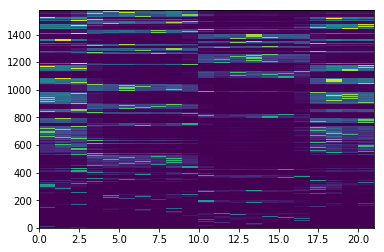

In [5]:
envstep = struct_pt1.objnum.values - 1
n_state = 21
M = np.zeros((n_state, n_state))
sr_reps = sr.neural_sr(envstep, .9, .1, M, n_state)
plt.pcolor(sr_reps)

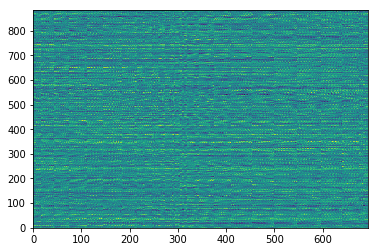

In [6]:
importlib.reload(rsa)
patterns = rsa.load_betas(data_dir, subject, roi)
plt.pcolor(patterns)

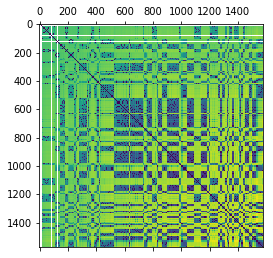

In [7]:
sr_rdm = distance.squareform(distance.pdist(sr_reps, 'correlation'))
#make SR matrix symmetric:
sr_rdm_sym = rsa.make_sym_matrix(sr_rdm)
plt.matshow(sr_rdm_sym)

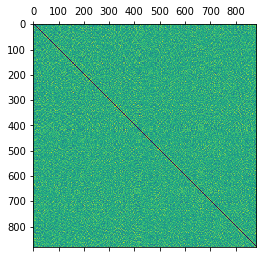

In [8]:
neural_rdm = distance.squareform(distance.pdist(patterns, 'correlation'))
#make SR matrix symmetric:
neural_rdm_sym = rsa.make_sym_matrix(neural_rdm)
plt.matshow(neural_rdm_sym)

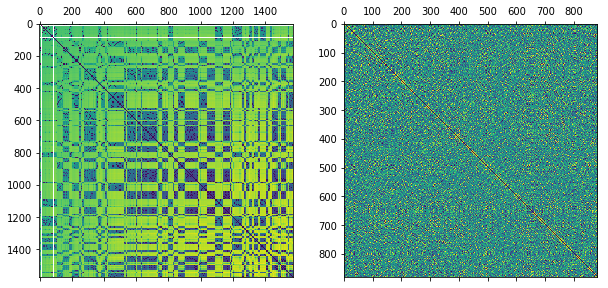

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].matshow(sr_rdm_sym)
vmin, vmax = np.percentile(distance.squareform(neural_rdm_sym), [1, 99])
ax[1].matshow(neural_rdm_sym, vmin=vmin, vmax=vmax)

In [10]:
stats.spearmanr(distance.squareform(sr_rdm_sym), distance.squareform(neural_rdm_sym))

ValueError: Distance matrix 'X' must be symmetric.

In [11]:
sr_rdm_sym.shape

(1575, 1575)

In [12]:
neural_rdm_sym.shape

(882, 882)